<a href="https://colab.research.google.com/github/chandru110/ML_LAB_ACTIVITIES/blob/main/lab%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- First 5 rows of the dataset ---
   disease_susceptible  gre   gpa  rank
0                    0  380  3.61     3
1                    1  660  3.67     3
2                    1  800  4.00     1
3                    1  640  3.19     4
4                    0  520  2.93     4


--- Data Split ---
Training set size: 320 samples
Testing set size: 80 samples


--- Model training complete! ---

--- Model Performance ---
Accuracy: 0.66
Accuracy is the percentage of correct predictions the model made.

Classification Report:
                 precision    recall  f1-score   support

Not Susceptible       0.67      0.96      0.79        53
    Susceptible       0.50      0.07      0.13        27

       accuracy                           0.66        80
      macro avg       0.59      0.52      0.46        80
   weighted avg       0.61      0.66      0.57        80



Confusion Matrix:


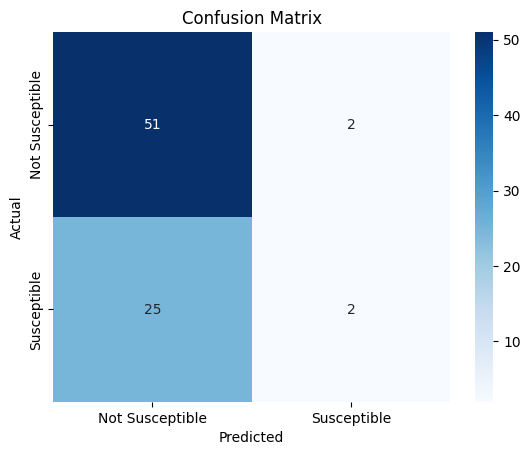

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://stats.idre.ucla.edu/stat/data/binary.csv"

df = pd.read_csv(url)

df.rename(columns={'admit': 'disease_susceptible'}, inplace=True)

print("--- First 5 rows of the dataset ---")
print(df.head())
print("\n")


features = ['gre', 'gpa', 'rank']
target = 'disease_susceptible'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"--- Data Split ---")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("\n")


# --- 3. Train a Logistic Regression Model ---

model = LogisticRegression(max_iter=1000)


model.fit(X_train, y_train)
print("--- Model training complete! ---\n")

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"--- Model Performance ---")
print(f"Accuracy: {accuracy:.2f}")
print("Accuracy is the percentage of correct predictions the model made.\n")


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Susceptible', 'Susceptible']))
print("\n")


print("Confusion Matrix:")``
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Susceptible', 'Susceptible'],
            yticklabels=['Not Susceptible', 'Susceptible'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()